The point of this notebook is to demonstrate the curse of dimensionality. I want to show that estimators in high dimensional spaces need more data points if you want them to have a similar amount of variance to the estimators in low dimenisons. 

In [1]:
import numpy as np

num_dimensions = [1, 10, 100, 1000]
num_data_points = [10, 100, 1000, 10000, 100000]
num_samples = 100
std_distances = np.zeros([len(num_data_points), len(num_dimensions)])

for ii_dim_index, ii_dim in enumerate(num_dimensions):

    print('Dimension', ii_dim)

    # Create the covariance matrices
    cov = np.zeros([ii_dim, ii_dim])
    mean = np.zeros([ii_dim])
    print('Making mean and covariance matrices')

    for jj_row in range(ii_dim):
        for kk_col in range(jj_row, ii_dim):
            cov[jj_row, kk_col] = 2 if jj_row == kk_col else 1

    cov = cov + cov.T - np.diag(cov.diagonal())

    for jj_data_index, jj_data_points in enumerate(num_data_points):
        print('Num data points', jj_data_points)
        temp_means = np.zeros([num_samples, ii_dim])
        for kk_sample in range(num_samples):
            data = np.random.multivariate_normal(mean, cov, jj_data_points)
            temp_means[kk_sample] = np.mean(data, axis = 0)

        distances = np.sqrt(np.sum(temp_means ** 2, axis = 1))
        std_distances[jj_data_index, ii_dim_index] = np.std(distances)

Dimension 1
Making mean and covariance matrices
Num data points 10
Num data points 100
Num data points 1000
Num data points 10000
Num data points 100000
Dimension 10
Making mean and covariance matrices
Num data points 10
Num data points 100
Num data points 1000
Num data points 10000
Num data points 100000
Dimension 100
Making mean and covariance matrices
Num data points 10
Num data points 100
Num data points 1000
Num data points 10000
Num data points 100000
Dimension 1000
Making mean and covariance matrices
Num data points 10
Num data points 100
Num data points 1000
Num data points 10000
Num data points 100000


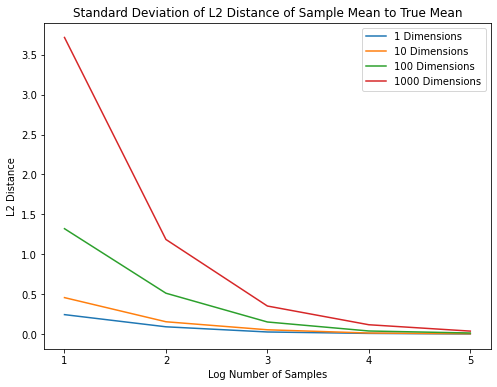

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 6))
lines = plt.plot(np.log10(num_data_points), std_distances)
labels = [f'{ii_dim} Dimensions' for ii_dim in num_dimensions]
plt.legend(lines, labels)
plt.title('Standard Deviation of L2 Distance of Sample Mean to True Mean')
plt.xlabel('Log Number of Samples')
plt.ylabel('L2 Distance')
plt.xticks(np.log10(num_data_points))
plt.show()
